In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [2]:
fft_df=pd.read_csv("fft_8_fn_vs_threshold_vs_trainingIterations.csv", delimiter=";")

In [3]:
fft_df.head()

,Unnamed: 0,name,regions,trainingIterations,threshold,fn_rate
0,0,NaN,16,800,0.0,87.845265
1,1,NaN,16,800,1.0,33.755314
2,2,NaN,16,800,10.0,17.323481
3,3,NaN,16,800,20.0,10.909780
4,4,NaN,16,800,50.0,4.999597


In [4]:
fft_df.dropna(axis=1, inplace=True)

In [63]:
ann_df=pd.read_csv("ann_fn_vs_threshold_vs_trainingIterations.csv", delimiter=";")

In [64]:
ann_df.dropna(axis=1, inplace=True)

In [7]:
gauss_df=pd.read_csv("gauss_fn_vs_threshold_vs_trainingIterations.csv", delimiter=";")

In [8]:
gauss_df.dropna(axis=1, inplace=True)

In [12]:
latnav_df=pd.read_csv("latnav_2_fn_vs_threshold_vs_trainingIterations.csv", delimiter=";")

In [13]:
latnav_df.dropna(axis=1, inplace=True)

In [90]:
latnav_df=latnav_df[latnav_df['trainingIterations'] <= 51200]
latnav_y = [
    latnav_df[latnav_df["threshold"] == 1.0],
    latnav_df[latnav_df["threshold"] == 10.0],
#    latnav_df[latnav_df["threshold"] == 20.0],
#    latnav_df[latnav_df["threshold"] == 50.0,
    latnav_df[latnav_df["threshold"] == 100.0],
#    latnav_df[latnav_df["threshold"] == 200.0],
#    latnav_df[latnav_df["threshold"] == 500.0],
#    latnav_df[latnav_df["threshold"] == 1000.0]
]

# For ann
ann_df=ann_df[ann_df['trainingIterations']<=51200]
ann_y = [
    ann_df[ann_df["threshold"] == 0.001],
    ann_df[ann_df["threshold"] == 0.01],
#    ann_df[ann_df["threshold"] == 20.0],
#    ann_df[ann_df["threshold"] == 50.0],
    ann_df[ann_df["threshold"] == 0.02],
#    ann_df[ann_df["threshold"] == '200.0'],
#    ann_df[ann_df["threshold"] == '500.0'],
#    ann_df[ann_df["threshold"] == '1000.0']
]

# For gauss
gauss_df=gauss_df[gauss_df['trainingIterations']<=51200]
gauss_y = [
    gauss_df[gauss_df["threshold"] == 1.0],
    gauss_df[gauss_df["threshold"] == 10.0],
#    gauss_df[gauss_df["threshold"] == '20.0'],
#    gauss_df[gauss_df["threshold"] == '50.0'],
    gauss_df[gauss_df["threshold"] == 100.0],
#    gauss_df[gauss_df["threshold"] == '200.0'],
    #gauss_df[gauss_df["fn_rate"] == '500.0'],
#    gauss_df[gauss_df["threshold"] == '1000.0']
]

# For fft
fft_df=fft_df[fft_df['trainingIterations']<=51200]
fft_y = [
    fft_df[fft_df["threshold"] == 1.0],
    fft_df[fft_df["threshold"] == 10.0],
#    fft_df[fft_df["threshold"] == '20.0'],
#    fft_df[fft_df["threshold"] == '50.0'],
    fft_df[fft_df["threshold"] == 100.0],
#    fft_df[fft_df["threshold"] == '200.0'],
    #fft_df[fft_df["threshold"] == '500.0'],
#    fft_df[fft_df["threshold"] == '1000.0']
]
colors={
    'fft': 'red',
    'latnav': 'blue',
    'ann':'orange',
    'gauss':'green'
}
markers=['.', '^', 'P']

In [91]:
print (latnav_y[0], ann_y[0], gauss_y[0], fft_y[0])
print (ann_y[1])
print (ann_y[2])

    Unnamed: 0  regions  trainingIterations  threshold   fn_rate
1            1       16                 800        1.0  2.647019
10           1       16                1600        1.0  3.441099
19           1       16                3200        1.0  4.309887
28           1       16                6400        1.0  4.915550
37           1       16               12800        1.0  5.774655
46           1       16               25600        1.0  5.835073
55           1       16               51200        1.0  5.922962     Unnamed: 0  regions  trainingIterations  threshold    fn_rate
1            1       16                 800      0.001  19.651496
10           1       16                1600      0.001  19.621808
19           1       16                3200      0.001  19.616357
28           1       16                6400      0.001  20.226019
37           1       16               12800      0.001  20.447087
46           1       16               25600      0.001  20.447856
55           1    

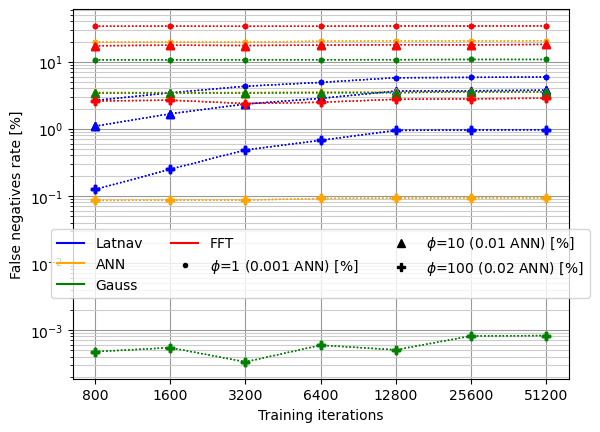

In [130]:
for m in markers:
    for i, m in zip(range(len(latnav_y)), markers):
        plt.plot(np.log2((latnav_y[i]["trainingIterations"]/100)).astype(int), latnav_y[i]['fn_rate'], label="Latnav", color=colors['latnav'], marker=m, linewidth=1, linestyle='dotted')
        plt.plot(np.log2((ann_y[i]["trainingIterations"]/100)).astype(int), ann_y[i]['fn_rate'], label="ANN", color=colors['ann'], marker=m, linewidth=1, linestyle='dotted')
        plt.plot(np.log2((gauss_y[i]["trainingIterations"]/100)).astype(int), gauss_y[i]['fn_rate'], label="Gaussian blur", color=colors['gauss'], marker=m, linewidth=1, linestyle='dotted')
        plt.plot(np.log2((fft_y[i]["trainingIterations"]/100)).astype(int), fft_y[i]['fn_rate'], label="FFT", color=colors['fft'], marker=m, linewidth=1, linestyle='dotted')


plt.grid(visible=True, which='major', color='0.6')
plt.grid(visible=True, which='minor', color='0.8')

plt.yscale('log')
#plt.xscale('log')
ax=plt.gca()
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,pos: ('{:d}'.format(int(pow(2, x))*100))))




# #ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: ('{:d}%'.format(int(x)))))

#plt.tick_params(axis='y', which='minor')
#plt.tick_params(axis='x', which='minor')


plt.xlabel("Training iterations")
plt.ylabel("False negatives rate [%]")

#plt.xlim((0.01, 1000))
#plt.ylim((0.001, 100))

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=colors['latnav']),
                Line2D([0], [0], color=colors['ann']),
                Line2D([0], [0], color=colors['gauss']),
                Line2D([0], [0], color=colors['fft']),
                Line2D([], [], color='black', marker='.', linestyle='None'),#, markersize=10),
                Line2D([], [], color='black', marker='^', linestyle='None'),#, markersize=10),
                Line2D([], [], color='black', marker='P', linestyle='None'),#, markersize=10)
               ]

ax.legend(custom_lines, ['Latnav', 'ANN', 'Gauss', 'FFT', '$\phi$=1 (0.001 ANN) [%] ', '$\phi$=10 (0.01 ANN) [%] ', '$\phi$=100 (0.02 ANN) [%] '], ncol=3,
         loc='lower center', bbox_to_anchor=(0.5, 0.2))
         #loc='lowercenter')

plt.savefig('false_negatives_vs_threshold_vs_training_iterations_log.pdf')

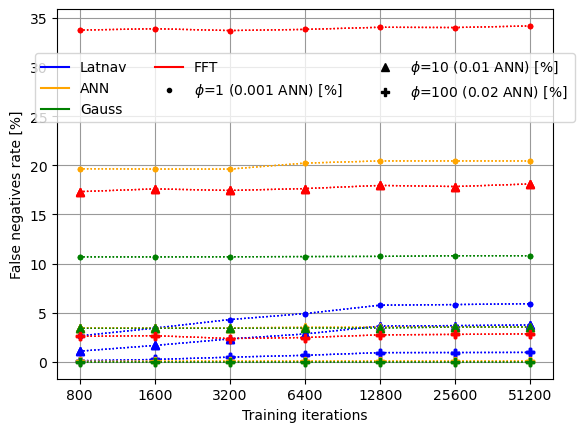

In [128]:
for m in markers:
    for i, m in zip(range(len(latnav_y)), markers):
        plt.plot(np.log2((latnav_y[i]["trainingIterations"]/100)).astype(int), latnav_y[i]['fn_rate'], label="Latnav", color=colors['latnav'], marker=m, linewidth=1, linestyle='dotted')
        plt.plot(np.log2((ann_y[i]["trainingIterations"]/100)).astype(int), ann_y[i]['fn_rate'], label="ANN", color=colors['ann'], marker=m, linewidth=1, linestyle='dotted')
        plt.plot(np.log2((gauss_y[i]["trainingIterations"]/100)).astype(int), gauss_y[i]['fn_rate'], label="Gaussian blur", color=colors['gauss'], marker=m, linewidth=1, linestyle='dotted')
        plt.plot(np.log2((fft_y[i]["trainingIterations"]/100)).astype(int), fft_y[i]['fn_rate'], label="FFT", color=colors['fft'], marker=m, linewidth=1, linestyle='dotted')


plt.grid(visible=True, which='major', color='0.6')
plt.grid(visible=True, which='minor', color='0.8')

#plt.yscale('log')
#plt.xscale('log')
ax=plt.gca()
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x,pos: ('{:d}'.format(int(pow(2, x))*100))))




# #ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: ('{:d}%'.format(int(x)))))

#plt.tick_params(axis='y', which='minor')
#plt.tick_params(axis='x', which='minor')


plt.xlabel("Training iterations")
plt.ylabel("False negatives rate [%]")

#plt.xlim((0.01, 1000))
#plt.ylim((0.001, 100))

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=colors['latnav']),
                Line2D([0], [0], color=colors['ann']),
                Line2D([0], [0], color=colors['gauss']),
                Line2D([0], [0], color=colors['fft']),
                Line2D([], [], color='black', marker='.', linestyle='None'),#, markersize=10),
                Line2D([], [], color='black', marker='^', linestyle='None'),#, markersize=10),
                Line2D([], [], color='black', marker='P', linestyle='None'),#, markersize=10)
               ]

ax.legend(custom_lines, ['Latnav', 'ANN', 'Gauss', 'FFT', '$\phi$=1 (0.001 ANN) [%] ', '$\phi$=10 (0.01 ANN) [%] ', '$\phi$=100 (0.02 ANN) [%] '], ncol=3,
         loc='upper center', bbox_to_anchor=(0.5, 0.9))
         #loc='lowercenter')

plt.savefig('false_negatives_vs_threshold_vs_training_iterations_lin.pdf')